In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
x_data = np.linspace(0, 10, 1_000_000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
# y = mx + b

# b = 5

y_true = 0.5 * x_data + 5 + noise
y_true

array([ 4.58890906,  4.39738417,  6.02326062, ..., 10.73795658,
        9.99981866, 11.03774456])

In [5]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

y_df = pd.DataFrame(data=y_true, columns=['Y'])

my_data = pd.concat([x_df, y_df], axis=1)

my_data.head()

,X Data,Y
0,0.00000,4.588909
1,0.00001,4.397384
2,0.00002,6.023261
3,0.00003,5.175096
4,0.00004,4.341330


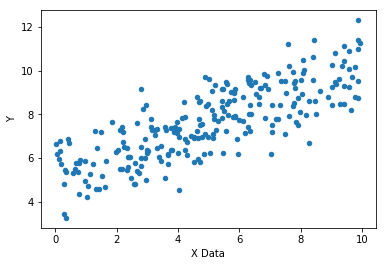

In [6]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [7]:
batch_size = 10

In [8]:
m = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())

In [9]:
xph = tf.placeholder(tf.float32, [batch_size])
yph = tf.placeholder(tf.float32, [batch_size])

In [10]:
y_model = m * xph + b

In [11]:
error = tf.reduce_sum(tf.square(yph - y_model))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 2000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed_dict = {
            xph: x_data[rand_ind],
            yph: y_true[rand_ind]
        }
        
        sess.run(train, feed_dict)
    
    m_model, b_model = sess.run([m, b])
    print(m_model, b_model)

0.494436 4.988778


In [15]:
y_hat = x_data * m_model + b_model

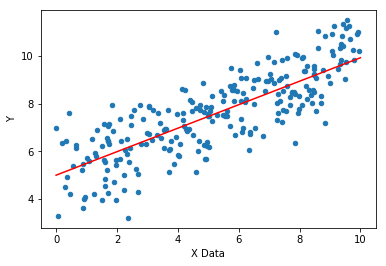

In [16]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

# TF Estimator

In [17]:
feat_cols = [
    tf.feature_column.numeric_column('x', shape=[1])
]

In [18]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmpqacvdbpy', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x11f4eaeb8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [21]:
print(x_train.shape, y_test.shape)

(700000,) (300000,)


In [22]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True
)

In [23]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False
)

In [24]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False
)

In [25]:
estimator.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmpqacvdbpy/model.ckpt.
INFO:tensorflow:loss = 452.55652, step = 1
INFO:tensorflow:global_step/sec: 870.824
INFO:tensorflow:loss = 57.10168, step = 101 (0.116 sec)
INFO:tensorflow:global_step/sec: 1023.46
INFO:tensorflow:loss = 5.4219937, step = 201 (0.098 sec)
INFO:tensorflow:global_step/sec: 1311.87
INFO:tensorflow:loss = 11.651161, step = 301 (0.076 sec)
INFO:tensorflow:global_step/sec: 1102.6
INFO:tensorflow:loss = 8.795177, step = 401 (0.091 sec)
INFO:tensorflow:global_step/sec: 1135.41
INFO:tensorflow:loss = 10.75143, step = 501 (0.088 sec)
INFO:tensorflow:global_step/sec: 1157.08
INFO:tensorflow:loss = 7.6822443, step = 601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1133.53
INFO:tensorflow:loss = 17.204494, step = 701 (0.089 sec)
INFO:tensorflow:global_step/sec: 1141.24
INFO:tensorflow:loss = 9.8397045, step = 801 (0.087 sec)
INFO:tensorflo

In [26]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-02-14-14:38:30
INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmpqacvdbpy/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-02-14-14:38:31
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1015157, global_step = 1000, loss = 8.812125


In [27]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Starting evaluation at 2018-02-14-14:39:31
INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmpqacvdbpy/model.ckpt-1000
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-02-14-14:39:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0922204, global_step = 1000, loss = 8.737763


In [28]:
print(train_metrics)

{'average_loss': 1.1015157, 'loss': 8.812125, 'global_step': 1000}


In [29]:
print(test_metrics)

{'average_loss': 1.0922204, 'loss': 8.737763, 'global_step': 1000}


In [30]:
brand_new_data = np.linspace(0, 10, 10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn(
    {'x': brand_new_data}, shuffle=False
)

In [32]:
predictions = list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Restoring parameters from /var/folders/0q/36d1fl0d3n1537ld143pvb0r0000gn/T/tmpqacvdbpy/model.ckpt-1000


In [34]:
predictions = [pred['predictions'] for pred in predictions]

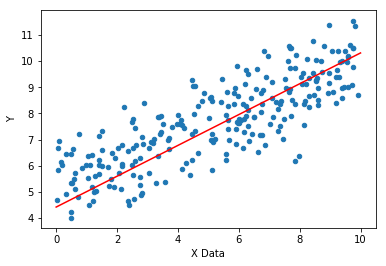

In [35]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data, predictions, 'r')